In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from params import *
import shutil


2024-08-22 10:30:12.115789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-22 10:30:12.248965: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-22 10:30:12.254317: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-22 10:30:12.254333: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

'''
Load a picture
Predict city or countryside
Copy that picture into a /data/classified_data/country/biome directory
'''


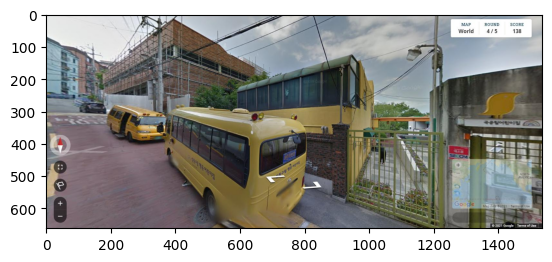

In [3]:
img=Image.open('../data/compressed_dataset/South Korea/canvas_1629258026.jpg')
plt.imshow(img)

In [4]:
image = tf.keras.preprocessing.image.img_to_array(img)


In [5]:
image.resize(66,153,3)

In [6]:
image.shape

(66, 153, 3)

In [7]:
image = tf.expand_dims(image, axis=0)
image.shape

2024-08-21 17:57:09.436512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-21 17:57:09.437280: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-21 17:57:09.437409: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-651FHBV): /proc/driver/nvidia/version does not exist
2024-08-21 17:57:09.441991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([1, 66, 153, 3])

In [8]:
model = load_model("../model_1.h5")

model.predict(image)

1/1 [==============================] - 0s 266ms/step


array([[0.18420483, 0.1412088 , 0.14541228, 0.1991395 , 0.17847362,
        0.15156096]], dtype=float32)

In [9]:
model_city = load_model('20240821-175159.h5')

In [10]:
result = model_city.predict(image)
result[0][0]

1/1 [==============================] - 0s 87ms/step


0.778435

In [11]:
data_dir = '/home/kenjiro/code/kieran-byrne/Geo_Learning/data'
tiny_dir = os.path.join(data_dir, 'tiny_dataset')
dest_dir = 'biome_data'

In [13]:
count = 0
for dir in os.listdir(tiny_dir):
    print(dir)
    country_directory = os.path.join(data_dir,dest_dir,dir)

    if os.path.isdir(country_directory):
        shutil.rmtree(country_directory)

    os.mkdir(country_directory)
    os.mkdir(os.path.join(country_directory,'city'))
    os.mkdir(os.path.join(country_directory,'countryside'))
    for file in os.listdir(os.path.join(tiny_dir,dir)):
        image = Image.open(os.path.join(tiny_dir,dir,file))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image.resize(66,153,3)
        image = tf.expand_dims(image, axis=0)
        result = model_city.predict(image)
        if result[0][0] < 0.5:
            shutil.copyfile(os.path.join(tiny_dir,dir,file), os.path.join(country_directory,'countryside',file))
        else:
            shutil.copyfile(os.path.join(tiny_dir,dir,file), os.path.join(country_directory,'city',file))
        count += 1
        print(file, ' has been transferred with a score of ', result[0][0],'. N°',count)


Poland
1/1 [==============================] - 0s 29ms/step
canvas_1629325813.jpg  has been transferred with a score of  0.88141316 . N° 1
1/1 [==============================] - 0s 22ms/step
canvas_1629699606.jpg  has been transferred with a score of  0.94833845 . N° 2
1/1 [==============================] - 0s 23ms/step
canvas_1629263006.jpg  has been transferred with a score of  0.72662145 . N° 3
1/1 [==============================] - 0s 21ms/step
canvas_1629683434.jpg  has been transferred with a score of  0.67129433 . N° 4
1/1 [==============================] - 0s 24ms/step
canvas_1629502163.jpg  has been transferred with a score of  0.66226065 . N° 5
1/1 [==============================] - 0s 25ms/step
canvas_1630029313.jpg  has been transferred with a score of  0.6595145 . N° 6
1/1 [==============================] - 0s 22ms/step
canvas_1630009039.jpg  has been transferred with a score of  0.5118309 . N° 7
1/1 [==============================] - 0s 22ms/step
canvas_1629866539.jpg  has